In [1]:
from PIL import Image

In [2]:
def merge(image1_path, image2_path):
    '''
    Merge two images. The second one will be merged into the first one.
    INPUT: Path to the first image, path to the second image
    OUTPUT: A new merged image.
    '''

    img1 = Image.open(image1_path)
    img2 = Image.open(image2_path)

    # Ensure image 1 is larger than image 2
    if img2.size[0] > img1.size[0] or img2.size[1] > img1.size[1]:
        raise ValueError('Image 1 size is lower than image 2 size!')

    # Get the pixel map of the two images
    pixel_map1 = img1.load()
    pixel_map2 = img2.load()

    # Create a new image that will be outputted
    new_image = Image.new(img1.mode, img1.size)
    pixels_new = new_image.load()

    for i in range(img1.size[0]):
        for j in range(img1.size[1]):
            rgb1 = integer_to_binary(pixel_map1[i, j])

            # Use a black pixel as default
            rgb2 = integer_to_binary((0, 0, 0))

            # Check if the pixel map position is valid for the second image
            if i < img2.size[0] and j < img2.size[1]:
                rgb2 = integer_to_binary(pixel_map2[i, j])

            # Merge the two pixels and convert it to a integer tuple
            rgb = merge_rgb(rgb1, rgb2)

            pixels_new[i, j] = binary_to_integer(rgb)

    new_image.convert('RGB').save('stego.png')
    print('\nMerged image saved as "stego.png"\n')

    return new_image

In [3]:
def integer_to_binary(rgb):
    '''
    Convert RGB pixel values from integer to binary
    INPUT: An integer tuple (e.g. (220, 110, 96))
    OUTPUT: A string tuple (e.g. ("00101010", "11101011", "00010110"))
    '''
    r, g, b = rgb
    return ('{0:08b}'.format(r),
            '{0:08b}'.format(g),
            '{0:08b}'.format(b))
def binary_to_integer(rgb):
    '''
    Convert RGB pixel values from binary to integer.
    INPUT: A string tuple (e.g. ("00101010", "11101011", "00010110"))
    OUTPUT: Return an int tuple (e.g. (220, 110, 96))
    '''
    r, g, b = rgb
    return (int(r, 2),
            int(g, 2),
            int(b, 2))


In [4]:
def main():
    if(len(sys.argv) > 2):
        steg(sys.argv[1], sys.argv[2])
def steg(cover_path, hidden_path):
    '''
    Function to hide data (either an image or text) within another image
    INPUT: string, path to the cover image; string, path to the hidden data
    OUTPUT: a new image with the hidden data encoded in the least significant
    bits
    '''
    image.merge(cover_path, hidden_path)


In [5]:
def merge_rgb(rgb1, rgb2):
    '''
    Merge two RGB pixels using 4 least significant bits.
    INPUT: A string tuple (e.g. ("00101010", "11101011", "00010110")),
           Another string tuple (e.g. ("00101010", "11101011", "00010110"))
    OUTPUT: An integer tuple with the two RGB values merged
    '''
    r1, g1, b1 = rgb1
    r2, g2, b2 = rgb2
    rgb = (r1[:4] + r2[:4],
           g1[:4] + g2[:4],
           b1[:4] + b2[:4])
    return rgb


In [6]:
import cv2 
image1='a1.png'

image = cv2.imread(image1) 
cv2.imshow('image', image) 
k = cv2.waitKey(0) & 0xFF
if k == 27:  
    cv2.destroyAllWindows



In [7]:
image2='a3.png'

image = cv2.imread(image2) 
cv2.imshow('image', image) 
k = cv2.waitKey(0) & 0xFF
if k == 27:  
    cv2.destroyAllWindows



Merged image saved as "stego.png"



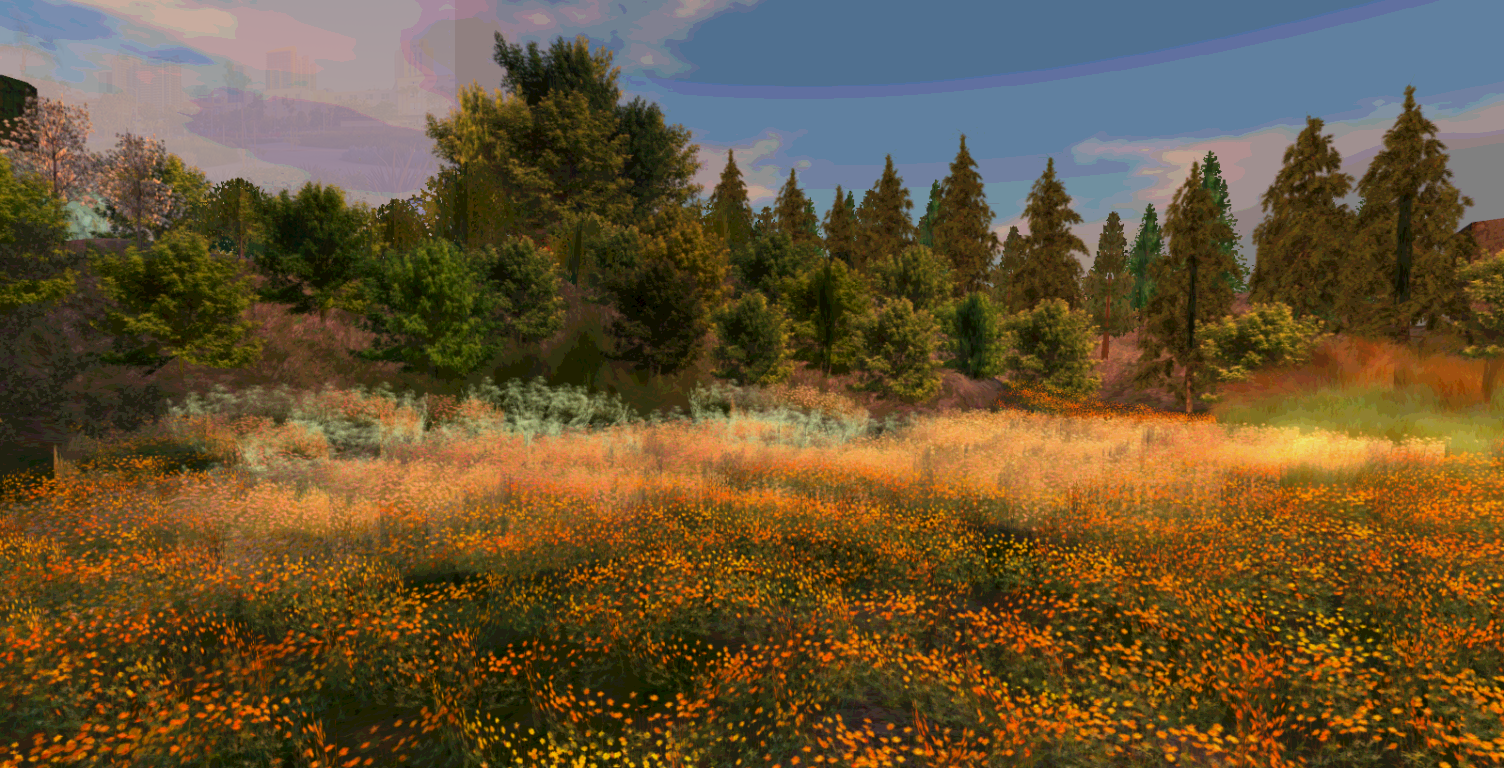

In [8]:
merge('a1.png','a3.png')